# Step 1: Exploration
## 1.1 Import Necessary Libraries

In [19]:
from pyspark.sql import SparkSession, Window
from pyspark.sql.types import *
from pyspark.sql.functions import *


## 1.2 Initialize Spark Session

In [11]:
spark = SparkSession.builder.appName("Stock Data Analysis").getOrCreate()

## 1.3 Load Data

In [12]:
# Assuming the files are named 'AMAZON.csv', 'APPLE.csv', etc.
stocks = ["AMAZON", "APPLE", "FACEBOOK", "GOOGLE", "MICROSOFT", "TESLA", "ZOOM"]
dataframes = {
    stock: spark.read.csv(f"data/{stock}.csv", header=True, inferSchema=True)
    for stock in stocks
}

## 1.4 Data Exploration Functions

In [13]:
def show_data_summary(df, stock_name):
    print(f"Data Summary for {stock_name}")
    df.show(40)
    df.describe().show()
    print(f"Total number of observations: {df.count()}\n")


# Example usage
for stock, df in dataframes.items():
    show_data_summary(df, stock)

Data Summary for AMAZON
+----------+-----------------+-----------------+-----------------+-----------------+--------+-----------------+------------+
|      Date|             High|              Low|             Open|            Close|  Volume|        Adj Close|company_name|
+----------+-----------------+-----------------+-----------------+-----------------+--------+-----------------+------------+
|2017-01-03| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562| 3521100|753.6699829101562|      AMAZON|
|2017-01-04|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812| 2510500|757.1799926757812|      AMAZON|
|2017-01-05|782.4000244140625| 760.260009765625|761.5499877929688|780.4500122070312| 5830100|780.4500122070312|      AMAZON|
|2017-01-06|799.4400024414062|  778.47998046875|782.3599853515625| 795.989990234375| 5986200| 795.989990234375|      AMAZON|
|2017-01-09|  801.77001953125|  791.77001953125|            798.0|796.9199829101562| 3446100|796.9199

24/01/13 12:22:29 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:708)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:752)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:675)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:641)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:617)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:574)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:532)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:65)


+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------+
|summary|              High|               Low|             Open|             Close|           Volume|         Adj Close|company_name|
+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------+
|  count|               987|               987|              987|               987|              987|               987|         987|
|   mean|1762.0071216958152|1722.1011452099956|1743.433881363487|1742.9566644206718| 4509728.05775076|1742.9566644206718|        NULL|
| stddev| 667.2385315752688| 644.7988093382758|657.1153070927137| 655.9576061129322|2179817.628631287| 655.9576061129322|        NULL|
|    min|  758.760009765625| 747.7000122070312|757.9199829101562| 753.6699829101562|           881300| 753.6699829101562|      AMAZON|
|    max|           3552.25|  3486.68994140625|        

+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------+
|summary|              High|               Low|              Open|             Close|              Volume|         Adj Close|company_name|
+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------+
|  count|               987|               987|               987|               987|                 987|               987|         987|
|   mean|57.322335375599344| 56.08516212123264| 56.68830042165584|56.735163877075564|1.2677001693920973E8|  55.3555844972682|        NULL|
| stddev|23.909537521895153| 23.04004228077875| 23.50911719644306|23.487454843800442| 6.043945164169236E7| 24.00281865091007|        NULL|
|    min|29.082500457763672|28.690000534057617|28.950000762939453|  29.0049991607666|           2.01978E7|27.247108459472656|       APPLE|
|    max|137.97999572753906

# Step 2: Functional Requirements Formalization
## 2.1 Functional Requirements Documentation


Read Data: Function to read CSV files into Spark DataFrames.

Data Summary: Function to display the first and last 40 rows, count observations, and show descriptive statistics.

Date Range Analysis: Function to determine the period between data points.

Correlation Analysis: Function to analyze correlations between different stocks.

Data Cleaning: Procedures for handling missing values and incorrect data types.

Advanced Analysis: Functions to calculate average opening/closing prices, daily returns, etc.

# Step 3: Pre-Processing
## 3.1 Data Cleaning and Preparation

In this step, we focus on preparing the data for analysis. This includes handling missing values, ensuring correct data types, and possibly creating new columns that might be useful for analysis.

In [14]:
# Example: Handling missing values and ensuring correct data types
for stock, df in dataframes.items():
    # Fill missing values if necessary, or drop them
    df = df.na.fill(0)  # or df.na.drop()

    # Ensure correct data types, especially for dates
    df = df.withColumn("Date", to_date(df["Date"], "yyyy-MM-dd"))

    # Update the dictionary with cleaned dataframes
    dataframes[stock] = df

## 3.2 Data Transformation

This might include creating new columns such as day-to-day returns or moving averages which are often used in stock market analysis.

In [15]:
# Example: Adding a column for day-to-day return
for stock, df in dataframes.items():
    df = df.withColumn("Day_to_Day_Return", (df["Close"] - df["Open"]) / df["Open"])
    dataframes[stock] = df

# Step 4: Analysis and Visualizations
## 4.1 Detailed Analysis
This step involves performing various analyses like computing average prices, identifying trends, and comparing different stocks.

In [16]:
# Example: Calculating average opening and closing prices
averages = {}
for stock, df in dataframes.items():
    avg_open = df.agg(avg("Open")).first()[0]
    avg_close = df.agg(avg("Close")).first()[0]
    averages[stock] = (avg_open, avg_close)

# Display the averages
for stock, (avg_open, avg_close) in averages.items():
    print(f"{stock} - Average Open: {avg_open}, Average Close: {avg_close}")

AMAZON - Average Open: 1743.433881363487, Average Close: 1742.9566644206718
APPLE - Average Open: 56.68830042165584, Average Close: 56.735163877075564
FACEBOOK - Average Open: 184.23939196461964, Average Close: 184.34894618968713
GOOGLE - Average Open: 1163.8854444324065, Average Close: 1164.8144006854736
MICROSOFT - Average Open: 122.32611970601957, Average Close: 122.34503256924367
TESLA - Average Open: 107.26065877433244, Average Close: 107.35318730208408
ZOOM - Average Open: 177.1945766625323, Average Close: 177.46828020750172


## 4.2 Creating Visualizations
Visualizations are key to understanding the trends and patterns in the data. We'll use libraries like Matplotlib or Seaborn for this purpose.

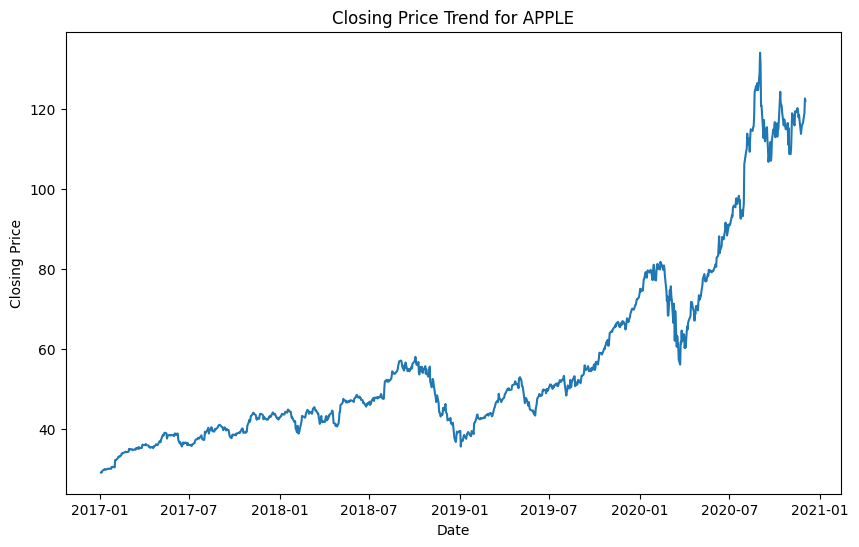

In [17]:
import matplotlib.pyplot as plt

# Example: Plotting the closing prices of a stock
stock = "APPLE"
df = dataframes[stock].toPandas()  # Converting to Pandas DataFrame for plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Close"])
plt.title(f"Closing Price Trend for {stock}")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Step 5: Advanced Functionalities
## 5.1 Implementation of Complex Features
This step focuses on implementing more sophisticated analysis techniques and algorithms that can provide deeper insights into the stock data.

In [20]:
# Example: Implementing a Moving Average Function
def calculate_moving_average(df, window_size=30):
    return df.withColumn(
        "Moving_Average",
        avg("Close").over(
            Window.partitionBy().orderBy("Date").rowsBetween(-window_size, 0)
        ),
    )


# Applying the moving average function
for stock, df in dataframes.items():
    df = calculate_moving_average(df)
    dataframes[stock] = df

# Step 6: Additional Insights
## 6.1 Diverse Analytical Perspectives
In this step, we aim to use the data to generate at least 8 insightful analyses. These could range from comparing stock performance during specific periods to predicting future trends.

In [21]:
# Example: Analysis 1 - Comparing Stock Performance in Different Years
def compare_yearly_performance(df, stock_name):
    yearly_performance = df.groupBy(year("Date")).agg(
        avg("Close").alias("Average_Close")
    )
    yearly_performance.show()
    # Additional code for plotting the results


# Example usage
for stock, df in dataframes.items():
    compare_yearly_performance(df, stock)

+----------+------------------+
|year(Date)|     Average_Close|
+----------+------------------+
|      2018|1641.7261758629545|
|      2019| 1789.189206077939|
|      2020| 2636.649604240712|
|      2017| 968.1670116409363|
+----------+------------------+

+----------+------------------+
|year(Date)|     Average_Close|
+----------+------------------+
|      2018|47.263356698936676|
|      2019|52.063988049825035|
|      2020| 92.56351605198414|
|      2017|37.637768870805836|
+----------+------------------+

+----------+------------------+
|year(Date)|     Average_Close|
+----------+------------------+
|      2018| 171.5109556889629|
|      2019| 181.6374996124752|
|      2020| 231.0295712057613|
|      2017|156.57617537053932|
+----------+------------------+

+----------+------------------+
|year(Date)|     Average_Close|
+----------+------------------+
|      2018| 1113.225134131443|
|      2019| 1188.393057444739|
|      2020|1456.6964127045333|
|      2017| 921.7808373439834|
+----

## 6.2 Custom Analyses Based on User Needs
Tailor the analyses to answer specific questions that potential investors might have. This could include risk assessment, growth potential, or comparison with market benchmarks.

In [22]:
# Example: Custom Analysis - Risk Assessment
def calculate_volatility(df):
    # Volatility could be calculated as the standard deviation of daily returns
    return df.withColumn(
        "Daily_Return", (df["Close"] - df["Open"]) / df["Open"]
    ).select(stddev("Daily_Return").alias("Volatility"))


# Applying the volatility calculation
for stock, df in dataframes.items():
    volatility = calculate_volatility(df)
    volatility.show()

+--------------------+
|          Volatility|
+--------------------+
|0.015506140857472072|
+--------------------+

+--------------------+
|          Volatility|
+--------------------+
|0.013966574203658072|
+--------------------+

+--------------------+
|          Volatility|
+--------------------+
|0.015587979159864008|
+--------------------+

+--------------------+
|          Volatility|
+--------------------+
|0.013317931178401854|
+--------------------+

+-------------------+
|         Volatility|
+-------------------+
|0.01354400574857001|
+-------------------+

+------------------+
|        Volatility|
+------------------+
|0.0289474884209065|
+------------------+

+-------------------+
|         Volatility|
+-------------------+
|0.03734452880142421|
+-------------------+



# Step 7: Development of a User Interface
## 7.1 User Interface Design
Designing a user-friendly interface that allows users to interact with the data and insights. This could be a web interface or a simple GUI application.

In [23]:
# Pseudocode for a simple GUI using Python's Tkinter library
import tkinter as tk


def create_gui():
    window = tk.Tk()
    window.title("Stock Data Analysis")

    # Add widgets like buttons, labels, and text areas for displaying data
    # ...

    window.mainloop()


# Call the function to run the GUI
create_gui()

ModuleNotFoundError: No module named '_tkinter'

## 7.2 Integration with Analysis Functions
Integrating the backend analysis functions with the UI so that users can input parameters and view results.

In [ ]:
# Example: Button click event to display stock data
def on_show_data_click(stock_name):
    # Fetch data and display it in the GUI
    # ...

# Bind this function to a button in the GUI
